In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn import linear_model
from sklearn import metrics

In [2]:
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## ВАХ без поправки на падение напряжения

In [3]:
up_va = pd.read_csv('up_VA.csv', encoding='utf-8')

In [4]:
x_open = 92.7
x = up_va.U_u[lambda df : df > x_open]

In [5]:
y = up_va.I_u[x.index]
print x
print y

4      94.0
5      96.2
6      98.3
7     100.6
8     102.0
9     104.5
10    105.9
11    107.8
12    112.0
Name: U_u, dtype: float64
4     4.41
5     4.82
6     5.25
7     5.70
8     5.96
9     6.46
10    6.72
11    7.07
12    7.88
Name: I_u, dtype: float64


In [6]:
regressor = linear_model.LinearRegression(fit_intercept=True) # Нельзя делать FixIntercept. Будет плохо
n = len(x)

In [7]:
regressor.fit(x.values.reshape(n, 1), y.values.reshape(n, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
regressor.coef_

array([[ 0.19321806]])

In [9]:
down_va = pd.read_csv('down_VA.csv', encoding='utf-8')

In [10]:
x_close = 75
x_d = down_va.U_d
y_d = down_va.I_d

regressor_d = linear_model.LinearRegression(fit_intercept=True)
n_d = len(x_d)
regressor.fit(x_d.values.reshape(n_d, 1), y_d.values.reshape(n_d, 1))
regressor.coef_


array([[ 0.19293817]])

In [11]:
r_pad = 5.1
up_va['u_u'] = up_va.I_u.apply(lambda x: x*r_pad)

In [12]:
up_va['U-u_u'] = up_va.U_u - up_va.u_u

In [13]:
r_pad = 5.1
down_va['u_d'] = down_va.I_d.apply(lambda x: x*r_pad)
down_va['U-u_d'] = down_va.U_d - down_va.u_d

In [14]:
df_res = pd.concat([up_va, down_va], axis=1)
regressor_res = linear_model.LinearRegression(fit_intercept=True)
x_r = pd.concat([df_res["U-u_u"], df_res["U-u_d"]]).dropna()
n_r = len(x_r)
y_r = pd.concat([df_res["I_u"], df_res["I_d"]]).dropna()
regressor_res.fit(x_r.values.reshape(n_r, 1), y_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ 71.          71.04107143  71.08214286  71.12321429  71.16428571
  71.20535714  71.24642857  71.2875      71.32857143  71.36964286
  71.41071429  71.45178571  71.49285714  71.53392857  71.575       71.61607143
  71.65714286  71.69821429  71.73928571  71.78035714  71.82142857  71.8625
  71.90357143  71.94464286  71.98571429  72.02678571  72.06785714
  72.10892857  72.15      ]
[ 0.73152879  1.03115112  1.33077345  1.63039578  1.93001812  2.22964045
  2.52926278  2.82888512  3.12850745  3.42812978  3.72775211  4.02737445
  4.32699678  4.62661911  4.92624145  5.22586378  5.52548611  5.82510844
  6.12473078  6.42435311  6.72397544  7.02359778  7.32322011  7.62284244
  7.92246478  8.22208711  8.52170944  8.82133177  9.12095411]


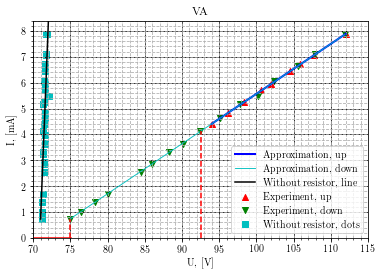

In [15]:
f = plt.subplot()
#UP
f.scatter(x, y, c='r', marker='^', label='Experiment, up')
x_pred = np.linspace(np.min(x), np.max(x), n)
y_pred = regressor.predict(x_pred.reshape(n, 1))
f.plot(x_pred, y_pred, c='b', linewidth=2, label='Approximation, up')
#DOWN
f.scatter(x_d, y_d, c='g', marker='v', label='Experiment, down')
x_d_pred = np.linspace(np.min(x_d), np.max(x_d), n_d)
y_d_pred = regressor.predict(x_d_pred.reshape(n_d, 1))
f.plot(x_d_pred, y_d_pred, c='c', linewidth=0.9,  label='Approximation, down')
# TURN LAMP ON AND OFF
f.plot([70, 75], [0, 0], color='r', linewidth=2.5)
f.plot([75, 75], [0, np.min(y_d)], color='r', linestyle='--')
f.plot([92.5, 92.5], [0, regressor.predict(np.array([92.5]).reshape(1, 1))], color='r', linestyle='--')
# WITHOUT RESISTOR
f.scatter(x_r, y_r, c='c', marker='s', label='Without resistor, dots')
x_r_pred = np.linspace(71, np.max(x_r), n_r)
y_r_pred = regressor_res.predict(x_r_pred.reshape(n_r, 1))
print x_r_pred
print y_r_pred
f.plot(x_r_pred, y_r_pred, c='k', label="Without resistor, line")

f.set_xlabel(r'U, [V]')
f.set_ylabel(r'I, [mA]')

maj_loc = MultipleLocator(1)
min_loc = MultipleLocator(0.2)

f.set_xlim((70, 115))
f.set_ylim((0, 8.4))
f.xaxis.set_major_locator(MultipleLocator(5))
f.xaxis.set_minor_locator(MultipleLocator(1))
f.yaxis.set_major_locator(maj_loc)
f.yaxis.set_minor_locator(min_loc)

f.grid(True, which='minor', linestyle='--')
f.grid(True, which='major', c='black', linestyle='-', alpha=1)
plt.title(r'VA')
plt.legend()

plt.savefig('va.pdf', fmt='pdf')
plt.show()